In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm, seaborn as sns


from sklearn.linear_model import LinearRegression

## Predict the delivery time using sorting time

In [27]:
df = pd.read_csv('delivery_time.csv')

In [28]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [29]:
df.rename(columns={'Delivery Time': 'dtime', 'Sorting Time': 'stime'}, inplace=True)
df

,dtime,stime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [37]:
y = df['dtime']
x = df['stime']

In [38]:
df.shape

(21, 2)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dtime   21 non-null     float64
 1   stime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [40]:

df.isnull().sum()

dtime    0
stime    0
dtype: int64

In [41]:
df.describe()

,dtime,stime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### visualization

Text(0, 0.5, 'Delivery Time')

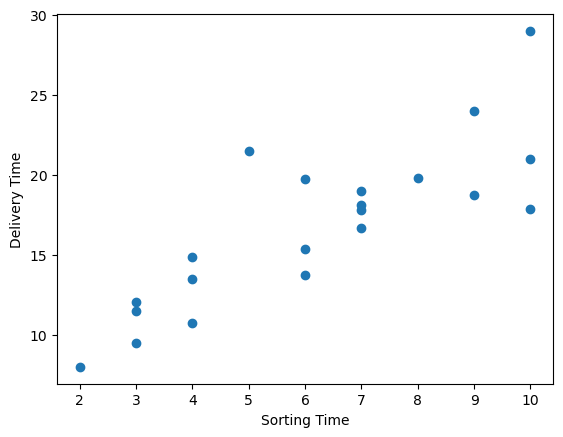

In [45]:
plt.scatter(x,y)
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')

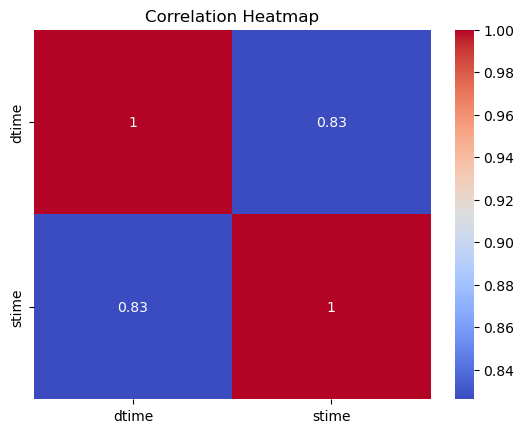

In [52]:
cm = df.corr()
sns.heatmap(cm, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

correlation is 83%

### 1. No Transformation

In [53]:
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

In [54]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  dtime   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    6.12e-15
Time:                        19:23:54   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
stime          2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

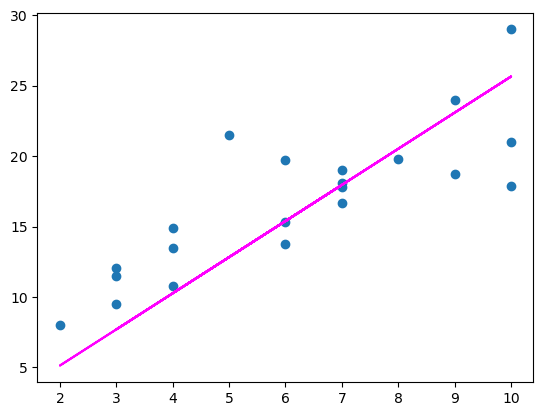

In [58]:
plt.scatter(x,y)
plt.plot(x, predictions, color='magenta')

### 2. Log Transformations of X

In [60]:
x_log = np.log(df['stime'])
predictions = model.predict(x_log)

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  dtime   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    6.12e-15
Time:                        19:30:28   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
stime          2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3 Log Transformation of Y 

In [63]:
y_log = np.log(df['dtime'])

In [65]:
model = sm.OLS(y_log, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  dtime   R-squared (uncentered):                   0.917
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              219.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):                    3.00e-12
Time:                        00:55:24   Log-Likelihood:                         -25.284
No. Observations:                  21   AIC:                                      52.57
Df Residuals:                      20   BIC:                                      53.61
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
stime          0.4008      0.027     14.821      0.000       0.344       0.457
==============================================================================
Omnibus:                        2.572   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.346
Skew:                          -0.275   Prob(JB):                        0.510
Kurtosis:                       1.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4 - Log Transformation of X & Y

In [66]:
model = sm.OLS(y_log, x_log).fit()
predictions = model.predict(x_log)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  dtime   R-squared (uncentered):                   0.972
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              688.7
Date:                Wed, 20 Sep 2023   Prob (F-statistic):                    5.72e-17
Time:                        00:58:00   Log-Likelihood:                         -13.899
No. Observations:                  21   AIC:                                      29.80
Df Residuals:                      20   BIC:                                      30.84
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
stime          1.5396      0.059     26.244      0.000       1.417       1.662
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.137
Skew:                           0.304   Prob(JB):                        0.566
Kurtosis:                       2.035   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5 - Sq Root Transformation of X

In [69]:
x_sq = np.sqrt(df['stime'])

In [70]:
model = sm.OLS(y, x_sq).fit()
predictions = model.predict(x_sq)

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  dtime   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):                    1.88e-17
Time:                        01:00:30   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
stime          6.9466      0.250     27.785      0.000       6.425       7.468
==============================================================================
Omnibus:                        6.818   Durbin-Watson:                   1.334
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                4.599
Skew:                           1.090   Prob(JB):                        0.100
Kurtosis:                       3.708   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6 - Square Root Transformation of Y

In [75]:
y_sq = np.sqrt(df['dtime'])

In [76]:
model = sm.OLS(y_sq, x).fit()
predictions = model.predict(x)

In [77]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  dtime   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.927
Method:                 Least Squares   F-statistic:                              266.0
Date:                Wed, 20 Sep 2023   Prob (F-statistic):                    5.09e-13
Time:                        01:01:11   Log-Likelihood:                         -31.484
No. Observations:                  21   AIC:                                      64.97
Df Residuals:                      20   BIC:                                      66.01
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
stime          0.5926      0.036     16.309      0.000       0.517       0.668
==============================================================================
Omnibus:                        1.452   Durbin-Watson:                   1.434
Prob(Omnibus):                  0.484   Jarque-Bera (JB):                1.105
Skew:                          -0.328   Prob(JB):                        0.575
Kurtosis:                       2.087   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Square Root Transformation of X & Y

In [79]:
model = sm.OLS(y_sqrt, x_sqrt).fit()
predictions = model.predict(x_sqrt)

In [80]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  dtime   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              1542.
Date:                Wed, 20 Sep 2023   Prob (F-statistic):                    2.10e-20
Time:                        01:01:45   Log-Likelihood:                         -13.658
No. Observations:                  21   AIC:                                      29.32
Df Residuals:                      20   BIC:                                      30.36
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
stime          1.6364      0.042     39.267      0.000       1.549       1.723
==============================================================================
Omnibus:                        0.176   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.916   Jarque-Bera (JB):                0.231
Skew:                          -0.179   Prob(JB):                        0.891
Kurtosis:                       2.632   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## We will use Model 7 as it has the best R square value

### p-value < 0.01

### coefficient == 1.64